<a href="https://colab.research.google.com/github/asefycom/Python-with-AI/blob/main/4th-week/L07/L07_api_call.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API هفته چهارم - درس ۷: دریافت داده با

واژه ای‌پی‌آی از سرنام واژه‌های این عبارت ساخته شده:

**API** : **A**pplication **P**rogramming **I**nterface

البته همون هفته اول با یک شیرجه سریع از ای‌پی‌آی استفاده کردی اما اینجا کمی مفهومی‌تر بهش می‌پردازیم.


اینجا از ای‌پی‌آی یک صرافی رمزارز استفاده می‌کنیم تا قیمت کنونی و چند شاخص تکنیکال بیتکوین رو دریافت کنیم.

## پیشنیازها

In [2]:
!pip install together python-dotenv requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
  Attempting uninstall: typer
    Found existing installation: typer 0.16.0
    Uninstalling typer-0.16.0:
      Successfully uninstalled typer-0.16.0


In [3]:
import os
import requests
#یادت نره ماژول و فایل دات انو رو کنار دفترچه قرار بدی!
from temperature_tools import print_llm_response

## API دریافت داده‌های بیت‌کوین با

صرافی «کوین دسک» تو بخش توسعه‌دهندگان خودش ای‌پی‌آی ارائه می‌کنه

[https://developers.coindesk.com](https://developers.coindesk.com).

البته برای حفظ امنیت، اغلب چنین سرویس‌هایی از شما می‌خوان که ثبت‌نام کنید و کلید منحصربه‌فرد به شما داده میشه.

بسته به طرح مالی سرویس گاهی چنین سرویس‌هایی کلید اولیه رایگان ارائه می‌کنن که مثلا تا فلان تاریخ یا فلان مقدار در ماه رایگان هست اما ورای این مرز باید پرداخت داشته باشین.

کوین دسک در حال حاضر ۱۱ هزار درخواست در ماه رو رایگان (البته با ثبت‌نام) مجاز کرده.  

من کلید ای‌پی‌آی خودم رو داخل فایل دات انو گذاشتم.

فایل به این درس پیوست شده اما شما باید خودتون ثبت نام و کلید خودتون رو جایگزین کنید بعد شروع به اجرای دفترچه کنید.

> توجه: فایل دات انو رو پیش از آغاز اجرای دفترچه باید کامل و ذخیره کنید.

In [4]:
from dotenv import load_dotenv

load_dotenv('.env', override=True)
my_coindesk_api_key = os.getenv('BITCOIN_API_KEY')

این جور سرویس ها همیشه مستندات ارائه می‌کنن. برای نمونه لینک پایین مستندات ای‌پی‌آی کوین‌دسک هست:

[صفحه اصلی مستندات کوین دسک](https://developers.coindesk.com/documentation/data-api/introduction)


تو این صفحه دقت کن زیر تیتر

`Authentication and Security`

به ما یک یوآرال داده که باید پارامترهای خودمون مثلا رمزارزی که نیاز داریم و کلیدمون رو داخل قرار بدیم.

من این کار رو با یک اف-استرینگ انجام می‌دم.

In [5]:
my_crypto = "BTC-USD"

In [6]:
url = f"https://data-api.coindesk.com/index/cc/v1/latest/tick?market=ccix&instruments={my_crypto}&api_key={my_coindesk_api_key}"

# نتیجه درخواستمون به این یوآرال رو با ریکوئست دریافت و ذخیره کنیم
response = requests.get(url)

In [7]:
print(response)

<Response [200]>


حالا ببینیم این یوآرال به ما چی داده؟ اچ‌تی‌ام‌ال؟ نه **جیسون**! اغلب ای‌پی‌آی‌ها همین رو برمی‌گردونن.  

جیسون سرنام واژه‌های این عبارت هست:‌
JSON : JavaScript Object Notation

جیسون خیلی شبیه دیکشنری در پایتون هست و میشه به دیکشنری تبدیلش کنیم و تو پایتون باهاش کار کنیم.

In [8]:
# به کمک تابع جیسون پکیج ریکوئست پاسخ دریافتی رو به دیکشنری تبدیل می‌کنیم
data = response.json()

# چاپ کن
print(data)

{'Data': {'BTC-USD': {'TYPE': '246', 'MARKET': 'ccix', 'INSTRUMENT': 'BTC-USD', 'CCSEQ': 821888172, 'VALUE': 116861.183188287, 'VALUE_FLAG': 'DOWN', 'VALUE_LAST_UPDATE_TS': 1754620611, 'VALUE_LAST_UPDATE_TS_NS': 334000000, 'LAST_UPDATE_QUANTITY': 0.00047442, 'LAST_UPDATE_QUOTE_QUANTITY': 55.4402752452, 'LAST_UPDATE_CCSEQ': 821866870, 'CURRENT_HOUR_VOLUME': 235.15318452, 'CURRENT_HOUR_QUOTE_VOLUME': 27482045.5699718, 'CURRENT_HOUR_OPEN': 116928.262798232, 'CURRENT_HOUR_HIGH': 116965.048142336, 'CURRENT_HOUR_LOW': 116797.191599018, 'CURRENT_HOUR_TOTAL_INDEX_UPDATES': 15067, 'CURRENT_HOUR_CHANGE': -67.079609945, 'CURRENT_HOUR_CHANGE_PERCENTAGE': -0.05736817458816661, 'CURRENT_DAY_VOLUME': 3014.99507754, 'CURRENT_DAY_QUOTE_VOLUME': 353336300.413271, 'CURRENT_DAY_OPEN': 117522.279210194, 'CURRENT_DAY_HIGH': 117698.379034276, 'CURRENT_DAY_LOW': 116797.191599018, 'CURRENT_DAY_TOTAL_INDEX_UPDATES': 118352, 'CURRENT_DAY_CHANGE': -661.096021907, 'CURRENT_DAY_CHANGE_PERCENTAGE': -0.56252825111109

کلیدها و مقدارها رو دقت کن. خیلی تودرتو هستن نه؟ مثلا کلید دیتا مقدارش یک دیشکنری هست بعد داخل همون دیکشنری ما باز یه کلید دیگه داریم که خودش مقدارش یک دیکشنری هست و ...

## دریافت لحظه‌ای بیتکوین

چون ساختارش تودرتو هست بیا از چت‌بات کمک بگیریم:

<p style="background-color:#F5C780; padding:15px"> 🤖 <b>از چت‌بات مشورت بگیر</b>:
<br><br>
How do I get the 'VALUE',from this dictionary in python:
<br><br>
{'Data': {'BTC-USD': {'TYPE': '246', 'MARKET': 'ccix', 'INSTRUMENT': 'BTC-USD', 'CCSEQ': 821548431, 'VALUE': 116452.565764449, 'VALUE_FLAG': 'UP', 'VALUE_LAST_UPDATE_TS': 1754588067, 'VALUE_LAST_UPDATE_TS_NS': 488000000, 'LAST_UPDATE_QUANTITY': 0.000396, 'LAST_UPDATE_QUOTE_QUANTITY': 46.1105172, 'LAST_UPDATE_CCSEQ': 821527138, 'CURRENT_HOUR_VOLUME': 711.69747347, 'CURRENT_HOUR_QUOTE_VOLUME': 82852453.9418414, 'CURRENT_HOUR_OPEN': 116297.455776521, 'CURRENT_HOUR_HIGH': 116601.740704283, 'CURRENT_HOUR_LOW': 116169.705752277, 'CURRENT_HOUR_TOTAL_INDEX_UPDATES': 27061, 'CURRENT_HOUR_CHANGE': 155.109987928, 'CURRENT_HOUR_CHANGE_PERCENTAGE': 0.133373500643094, 'CURRENT_DAY_VOLUME': 10379.34821091, 'CURRENT_DAY_QUOTE_VOLUME': 1203710241.85313, 'CURRENT_DAY_OPEN': 115038.445875502, 'CURRENT_DAY_HIGH': 116853.835560929, 'CURRENT_DAY_LOW': 114288.631531721, 'CURRENT_DAY_TOTAL_INDEX_UPDATES': 435974, 'CURRENT_DAY_CHANGE': 1414.119888947, 'CURRENT_DAY_CHANGE_PERCENTAGE': 1.2292585128257099, 'CURRENT_WEEK_VOLUME': 56253.53644694, 'CURRENT_WEEK_QUOTE_VOLUME': 6451435241.68721, 'CURRENT_WEEK_OPEN': 114238.82889799, 'CURRENT_WEEK_HIGH': 116853.835560929, 'CURRENT_WEEK_LOW': 112629.489553262, 'CURRENT_WEEK_TOTAL_INDEX_UPDATES': 2437030, 'CURRENT_WEEK_CHANGE': 2213.736866459, 'CURRENT_WEEK_CHANGE_PERCENTAGE': 1.93781474111203, 'CURRENT_MONTH_VOLUME': 110621.82324997, 'CURRENT_MONTH_QUOTE_VOLUME': 12657960556.4748, 'CURRENT_MONTH_OPEN': 115765.360865728, 'CURRENT_MONTH_HIGH': 116853.835560929, 'CURRENT_MONTH_LOW': 111925.952512887, 'CURRENT_MONTH_TOTAL_INDEX_UPDATES': 4890171, 'CURRENT_MONTH_CHANGE': 687.204898721, 'CURRENT_MONTH_CHANGE_PERCENTAGE': 0.5936187591710299, 'CURRENT_YEAR_VOLUME': 5722416.18110707, 'CURRENT_YEAR_QUOTE_VOLUME': 558142266370.909, 'CURRENT_YEAR_OPEN': 93391.9797711509, 'CURRENT_YEAR_HIGH': 123220.279317282, 'CURRENT_YEAR_LOW': 74426.9269415529, 'CURRENT_YEAR_TOTAL_INDEX_UPDATES': 241933293, 'CURRENT_YEAR_CHANGE': 23060.5859932981, 'CURRENT_YEAR_CHANGE_PERCENTAGE': 24.6922552127132, 'MOVING_24_HOUR_VOLUME': 13540.78137541, 'MOVING_24_HOUR_QUOTE_VOLUME': 1568335099.82042, 'MOVING_24_HOUR_OPEN': 115541.809959052, 'MOVING_24_HOUR_HIGH': 116853.835560929, 'MOVING_24_HOUR_LOW': 114288.631531721, 'MOVING_24_HOUR_TOTAL_INDEX_UPDATES': 588057, 'MOVING_24_HOUR_CHANGE': 910.755805397, 'MOVING_24_HOUR_CHANGE_PERCENTAGE': 0.788247826236902, 'MOVING_7_DAY_VOLUME': 110621.82324997, 'MOVING_7_DAY_QUOTE_VOLUME': 12657960556.4748, 'MOVING_7_DAY_OPEN': 115765.360865728, 'MOVING_7_DAY_HIGH': 116853.835560929, 'MOVING_7_DAY_LOW': 111925.952512887, 'MOVING_7_DAY_TOTAL_INDEX_UPDATES': 4890171, 'MOVING_7_DAY_CHANGE': 687.204898721, 'MOVING_7_DAY_CHANGE_PERCENTAGE': 0.5936187591710299, 'MOVING_30_DAY_VOLUME': 597444.79565755, 'MOVING_30_DAY_QUOTE_VOLUME': 69845965164.4786, 'MOVING_30_DAY_OPEN': 108955.047401975, 'MOVING_30_DAY_HIGH': 123220.279317282, 'MOVING_30_DAY_LOW': 108341.922802624, 'MOVING_30_DAY_TOTAL_INDEX_UPDATES': 24709565, 'MOVING_30_DAY_CHANGE': 7497.518362474, 'MOVING_30_DAY_CHANGE_PERCENTAGE': 6.881295122393841, 'MOVING_90_DAY_VOLUME': 1575254.03866487, 'MOVING_90_DAY_QUOTE_VOLUME': 173479704633.212, 'MOVING_90_DAY_OPEN': 102982.300604544, 'MOVING_90_DAY_HIGH': 123220.279317282, 'MOVING_90_DAY_LOW': 98264.4572284574, 'MOVING_90_DAY_TOTAL_INDEX_UPDATES': 69047536, 'MOVING_90_DAY_CHANGE': 13470.265159905, 'MOVING_90_DAY_CHANGE_PERCENTAGE': 13.0801750211731, 'MOVING_180_DAY_VOLUME': 3983243.65191103, 'MOVING_180_DAY_QUOTE_VOLUME': 384751994388.151, 'MOVING_180_DAY_OPEN': 96475.5931518285, 'MOVING_180_DAY_HIGH': 123220.279317282, 'MOVING_180_DAY_LOW': 74426.9269415529, 'MOVING_180_DAY_TOTAL_INDEX_UPDATES': 176410332, 'MOVING_180_DAY_CHANGE': 19976.9726126205, 'MOVING_180_DAY_CHANGE_PERCENTAGE': 20.7067631926157, 'MOVING_365_DAY_VOLUME': 11605872.0426164, 'MOVING_365_DAY_QUOTE_VOLUME': 1019025982766.01, 'MOVING_365_DAY_OPEN': 55130.4545733546, 'MOVING_365_DAY_HIGH': 123220.279317282, 'MOVING_365_DAY_LOW': 52552.0454599438, 'MOVING_365_DAY_TOTAL_INDEX_UPDATES': 433168620, 'MOVING_365_DAY_CHANGE': 61322.1111910944, 'MOVING_365_DAY_CHANGE_PERCENTAGE': 111.23091885538801}}, 'Err': {}}

</p>

این کد رو چت جی‌پی‌تی به من داد.

[لینک عمومی چت من با چت‌جی‌پی‌تی](https://chatgpt.com/share/6894f37a-391c-8005-b66a-5536fe17bfdd)

In [9]:
data = {
    'Data': {
        'BTC-USD': {
            'TYPE': '246',
            'MARKET': 'ccix',
            'INSTRUMENT': 'BTC-USD',
            'CCSEQ': 821548431,
            'VALUE': 116452.565764449,
            # سایر داده‌ها...
        }
    },
    'Err': {}
}

# گرفتن مقدار 'VALUE'
value = data['Data']['BTC-USD']['VALUE']
print(value)


116452.565764449


بیا قیمت بیتکوین رو قشنگ‌تر گزارش کنیم.

In [14]:
btc_price = f"The current value of BTC is ${value}."

print(btc_price)

The current value of BTC is $116452.565764449.


بعد من دوباره این سپارش فارسی ساده رو دادم به چت‌جی‌پی‌تی:

> مووینگ اورج های ۲۴ ساعت گذشته و ۷ روز گذشته و ۱ ماه گذشته رو هم بر اساس قیمت باز شدن بازار از دل این داده ها استخراج کن. کد پایتون بده

و این رو داد



In [11]:
data = {
    'Data': {
        'BTC-USD': {
            # ... (داده‌ها)
            'MOVING_24_HOUR_OPEN': 115541.809959052,
            'MOVING_7_DAY_OPEN': 115765.360865728,
            'MOVING_30_DAY_OPEN': 108955.047401975,
            # ... (سایر داده‌ها)
        }
    },
    'Err': {}
}

btc_data = data['Data']['BTC-USD']

moving_avg_24h = btc_data['MOVING_24_HOUR_OPEN']
moving_avg_7d = btc_data['MOVING_7_DAY_OPEN']
moving_avg_30d = btc_data['MOVING_30_DAY_OPEN']

print("📊 Moving Averages based on Open Price:")
print(f"24-hour: {moving_avg_24h}")
print(f"7-day:   {moving_avg_7d}")
print(f"30-day:  {moving_avg_30d}")

📊 Moving Averages based on Open Price:
24-hour: 115541.809959052
7-day:   115765.360865728
30-day:  108955.047401975


## استفاده از هوش مصنوعی برای پیش‌بینی تکنیکال

بیا قیمت جاری و میانگین‌های متحرک قیمت باز شدن بیتکوین در ۲۴ ساعت گذشته، ۷ روز گذشته و ۳۰ روز گذشته به مدل‌ زبانی بزرگ بدیم

 و ازش بخواهیم روند فردای بیت‌کوین رو فقط بر اساس این شاخص‌ها پیش‌بینی کنه

In [12]:
prompt = f"""You are an experienced cryptocurrency trader.
With the following indicators,
please predict the trend of Bitcoin for tomorrow.
Then translate it to fluent persian.

The current value of BTC is ${value}.
Moving Averages based on Open Price:
24-hour: {moving_avg_24h} ,
7-day:   {moving_avg_7d} ,
30-day:  {moving_avg_30d}
"""
print(prompt)

You are an experienced cryptocurrency trader. 
With the following indicators, 
please predict the trend of Bitcoin for tomorrow.
Then translate it to fluent persian. 

The current value of BTC is $116452.565764449.
Moving Averages based on Open Price:
24-hour: 115541.809959052 ,
7-day:   115765.360865728 ,
30-day:  108955.047401975



In [13]:
# چاپ جواب مدل
res = print_llm_response(prompt)
print(res)

Okay, let's analyze the Bitcoin data and predict the trend for tomorrow.

**Analysis:**

*   **Current Price:** $116,452.57
*   **24-hour Moving Average:** $115,541.81 - This is *below* the current price, indicating a short-term upward trend.
*   **7-day Moving Average:** $115,765.36 -  Also below the current price, reinforcing the short-term bullish momentum.
*   **30-day Moving Average:** $108,955.05 - Significantly lower than the current price. This confirms that Bitcoin is in a strong uptrend over the longer term.

**Prediction:**

Based on this data, the trend for Bitcoin tomorrow is likely to be **upward**. The short-term moving averages are below the current price, suggesting buying pressure. The longer-term trend is firmly established as bullish.  However, it's crucial to remember that cryptocurrency markets are volatile, and unexpected events can always impact the price.

**Disclaimer:** *I am an AI and cannot provide financial advice. This is an analysis based on the provided

## تمرین بیشتر

### تمرین ۱
بیا با یافته‌هایی که تا اینجا داری این پروژه جذاب رو بیشتر پیش‌ ببر و یک پروژه جذاب رو انجام بده.

[این صفحه از مستندات کوین دسک](https://developers.coindesk.com/documentation/data-api/news_v1_search) رو ببین. یوآرالی ارائه می‌کنه برای جستجوی اخبار مرتبط با یک کلیدواژه.

مثلا من این یوآرال رو با کلیدواژه «روند بیتکوین» و تعداد نتیجه بازگشتی ۲ صدا زدم تا ۲ خبر مرتبط با این کلیدواژه رو داشته باشم



In [21]:
search_keyword = "bitcoin trend"
number_of_results = 3

news_url = f"https://data-api.coindesk.com/news/v1/search?search_string={search_keyword}&lang=EN&source_key=coindesk&limit={number_of_results}&api_key={my_coindesk_api_key}"

In [22]:
news_response = requests.get(news_url)
print(news_response)

<Response [200]>


In [23]:
news_data = news_response.json()
print(news_data)

{'Data': [{'TYPE': '121', 'ID': 47274825, 'GUID': '2639ccfb-c135-4171-a413-d625570feb7c', 'PUBLISHED_ON': 1751469994, 'PUBLISHED_ON_NS': None, 'IMAGE_URL': 'https://resources.cryptocompare.com/news/5/47274825.jpeg', 'TITLE': 'Scaramucci Says Bitcoin Treasury Trend Will Fade Despite Saylor’s Success', 'SUBTITLE': 'The SkyBridge founder told Bloomberg that companies adding crypto to their balance sheets is temporary.', 'AUTHORS': 'Helene Braun,AI Boost', 'URL': 'https://www.coindesk.com/business/2025/07/02/scaramucci-says-bitcoin-treasury-trend-will-fade-despite-saylor-s-success', 'SOURCE_ID': 5, 'BODY': 'Anthony Scaramucci, the founder and managing partner of hedge fund SkyBridge Capital, says the wave of companies adopting a bitcoin (BTC) treasury strategy is just a passing trend. In an interview with Bloomberg, Scaramucci said he expects the approach to lose momentum in the coming months. “Right now we’re having this replicative treasury company idea,” Scaramucci said. “So, you know, 

به نظرت چرا تعداد مقاله‌های دریافتی فرد هست؟ چرا ۳ تا؟ نظر تو چندتاست؟

این دیکشنری رو واکاوی کن و متن (بادی) هر دو خبر رو استخراج و به صورت یک متن ادغام کن.

بعد این متن رو همراه با داده های تکنیکال ای‌پی‌آی قبلی به هوش مصنوعی بفرست تا نظرش در مورد روند فردای بیت‌کوین رو بر اساس داده‌های فنی و آخرین خبرها دریافت کنی.

### تمرین ۲

تکه کد پایین باعث خزش در یک صفحه تحلیل بیت‌کوین و دریافت عنوان آخرین تحلیل هست.

**هشدار**: برای اجرای محلی باید بیوتیفول‌سوپ نصب باشه.

**هشدار**: به دلیل محافظت کلودفلر از سایت ها شاید این صفحه در آینده با این کد قابل استخراج نباشه.

In [4]:
#اگه روی سیستم اجرا می‌کنی اول باید این دو بسته نصب باشن
!pip install requests beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup

analysis_url = "https://cryptopotato.com/bitcoin-price-analysis/"

response = requests.get(analysis_url)
response.encoding = response.apparent_encoding  # اطمینان از کدگذاری مناسب
soup = BeautifulSoup(response.text, 'html.parser')

# پیدا کردن اولین لینک تحلیل در صفحه
first_link = soup.find('h3') or soup.find('h2')  # ممکن است تیترها متفاوت باشند
if not first_link or not first_link.find('a'):
    print("مقاله‌ای پیدا نشد.")
    exit()

article_url = first_link.find('a')['href']

# واکشی صفحه مقاله
article_resp = requests.get(article_url)
article_resp.encoding = article_resp.apparent_encoding
article_soup = BeautifulSoup(article_resp.text, 'html.parser')

# استخراج عنوان
title = article_soup.find('h1').get_text(strip=True)
print("عنوان تحلیل:")
print(title)


عنوان تحلیل:
BTC’s Path to a New ATH: Key Obstacles You Need to Watch (Bitcoin Price Analysis)


In [7]:
# تصویر صفحه بالا رو دستی آپلود می‌کنم
# تا دید پیدا کنی که کد بالا چه بخشی رو بیرون کشیده
from google.colab import files
uploaded = files.upload()

Saving crypto-potato-btc-analysis.jpg to crypto-potato-btc-analysis.jpg


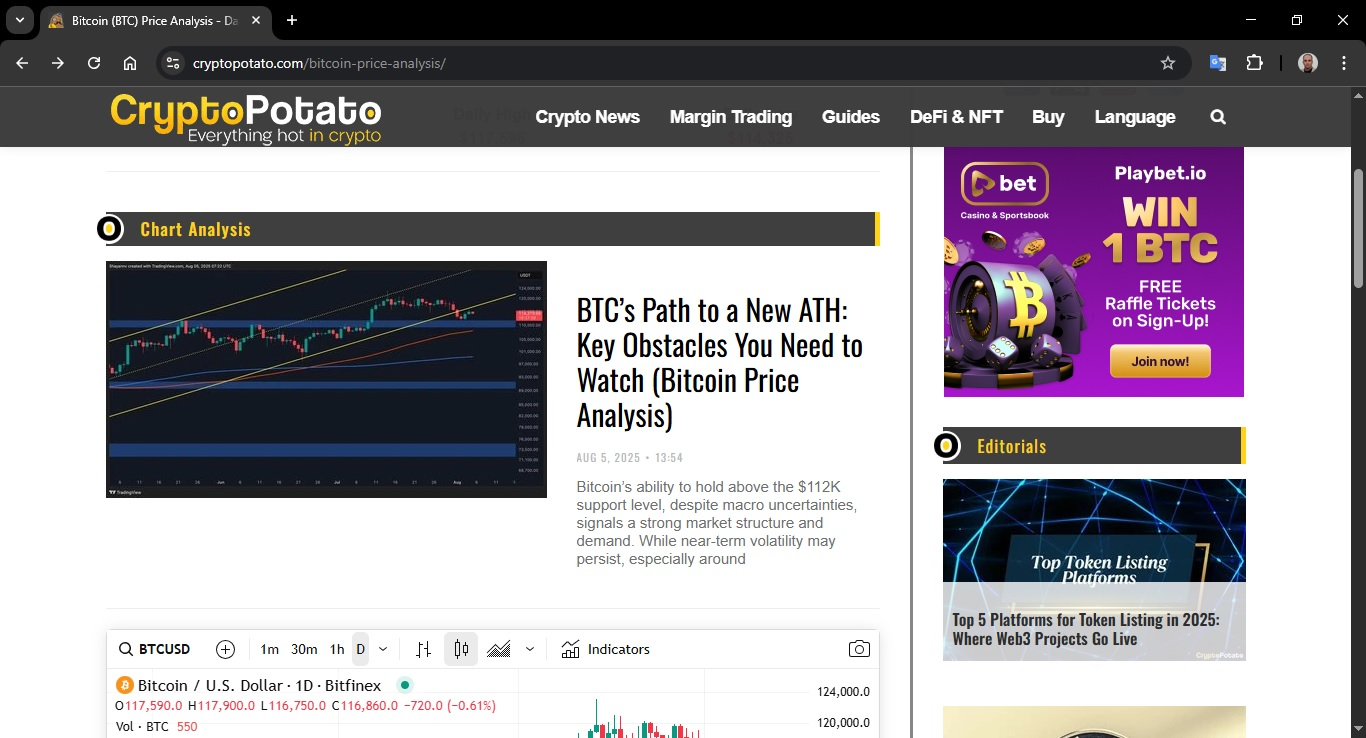

In [8]:
from IPython.display import Image, display
display(Image('crypto-potato-btc-analysis.jpg'))

حالا این کد رو با مشورت چت‌بات بسط دادم طوری که یوآرال این پست هم استخراج بشه.


In [3]:
import requests
from bs4 import BeautifulSoup

analysis_url = "https://cryptopotato.com/bitcoin-price-analysis/"

response = requests.get(url)
response.encoding = response.apparent_encoding
soup = BeautifulSoup(response.text, 'html.parser')

# پیدا کردن عنوان آخرین تحلیل از تگ <h1>
h1 = soup.find('h1')
if not h1:
    print("عنوان آخرین تحلیل پیدا نشد.")
    exit()

last_analysis_title = h1.get_text(strip=True)

# استخراج لینک: در این صفحه ممکن است لینک دقیق در alt یا anchor باشد
a_tag = h1.find_parent('a')
last_analysis_link = a_tag['href'] if a_tag and 'href' in a_tag.attrs else url  # اگر لینک نبود، لینک خود صفحه را نشان می‌دهد

print("📰 عنوان آخرین تحلیل:")
print(last_analysis_title)
print("\n🔗 لینک مقاله:")
print(last_analysis_link)


📰 عنوان آخرین تحلیل:
Bitcoin (BTC) Price Analysis – Daily Updates

🔗 لینک مقاله:
https://cryptopotato.com/bitcoin-price-analysis/


حالا نویت توست! با مشورت چت بات و البته الهام از درس ۶ کدی بنویس که محتوای این یوآرال رو با ریکوئست بگیری و بندهاش رو با بیوتیفول‌سوپ به صورت یک استرینگ یکپارچه دربیاری.

بعد استرینگ رو هم همراه آخرین خبرهایی که از کوین دسک گرفتی و شاخص های فنی بیت کوین که از کوین‌دسک گرفته بودی به مدل زبانی بفرست تا روند فردای بیت‌کوین رو با همه این اطلاعات پیش بینی و به صورت یک کلمه «صعودی» یا «نزولی» اعلام کنه.

### تمرین ۳

از چت بات کمک بگیر و اطلاعات پایین رو به صورت یک سطر به یک فایل سی اس وی اضافه کن. در واقع این فایل باید با هر اجرای دفترچه تو هر روز یک سطر جدید پیدا کنه.

* قیمت این لحظه بیت‌کوین
* میانگین متحرک ۲۴ ساعتی
* میانگین متحرک ۷ روزی
* میانگین متحرک ۳۰ روزی
* آخرین ۳ خبر
* تحلیل کارشناس
* پیش بینی هوش مصنوعی

### تمرین چالشی

به کمک چت بات کاری کن که یک ستون با عنوان «درستی پیش‌بینی» به سی‌اس‌وی اضافه بشه.

از روز دوم به بعد می‌تونی از ستون رو با مقدار ۰ یا ۱ پر کنی. اگه تفاوت قیمت روز دوم از روز اول مثبت باشه یعنی روز دوم صعود داشتیم. حالا گه پیش بینی هوش مصنوعی در روز قبل برای امروز «صعودی» بوده باشه یعنی امروز رو درست پیش‌بینی کرده پس مقدار «درستی پیش بینی» برای روز دوم باید ۱ بشه.

اما اگر این تفاوت منفی باشه یعنی درست پیش بینی نکرده.

با کمک هوش مصنوعی کد لازم رو بنویس.

**یادت باشه**: کدت رو هر روز باید ساعت یکسانی اجرا کنی. مثلا می‌تونی به کمک چت بات همه کدت رو داخل یک زمان‌بندی قرار بدی تا ساعت فلان هر روز اجرا بشه.